In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import collections
import pickle
import os


from training import *
from models import *
from A2C_agent import *
from helpers import *

%load_ext autoreload
%autoreload 2

### Load data and agents

To produce all plots

In [2]:

# # Load all_* dictionaries
# agent_name = "chose the agent" # for example 'agent5'
# with open('data/'+agent_name+'_data/all_dicts.pkl', 'rb') as f:
#     all_critic_losses, all_actor_losses, all_episode_rewards, \
#         all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories = pickle.load(f)

# # Load agent1 dictionary
# with open('data/'+agent_name+'_data/agent1.pkl', 'rb') as f:
#     agent1 = pickle.load(f)


# 4.3 Agent 6: Testing speed enhancement of K=6 N=6 A2C.
### Batched, k-workers A2C (n=6,k=6), continuous action space

In [3]:
# hyperparameters
stochastic_rewards = True
continuous = True
k=6
n=6
lr_actor=3e-4
lr_critic=1e-3
total_steps_budget = 500000
device = "cpu"
seeds = [734289, 324, 80435]

agent, \
all_critic_losses, all_actor_losses, all_episode_rewards, \
all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories \
= training_loop(k, n, continuous, seeds, lr_actor, lr_critic, total_steps_budget, stochastic_rewards, device)

-------- Episode 100 ended with reward 7.00 for model 0 --------
Actor loss: 0.4897, Critic loss: 0.4690
Total steps taken during training: 875
-------- Episode 200 ended with reward 12.00 for model 0 --------
Actor loss: 0.0472, Critic loss: 0.5635
Total steps taken during training: 1814
-------- Episode 300 ended with reward 6.00 for model 0 --------
Actor loss: -0.1047, Critic loss: 0.6834
Total steps taken during training: 2757
-------- Episode 400 ended with reward 6.00 for model 0 --------
Actor loss: -0.0963, Critic loss: 1.2487
Total steps taken during training: 4071
-------- Episode 500 ended with reward 16.00 for model 0 --------
Actor loss: -0.0501, Critic loss: 0.6854
Total steps taken during training: 6038
-------- Episode 600 ended with reward 22.00 for model 0 --------
Actor loss: -0.1445, Critic loss: 1.0131
Total steps taken during training: 8424
-------- Episode 700 ended with reward 19.00 for model 0 --------
Actor loss: -0.4036, Critic loss: 1.2257
Total steps taken

### training logging info

- losses and rewards are every 1k step
- evaluation rewards and value_trajectories are every 20k steps

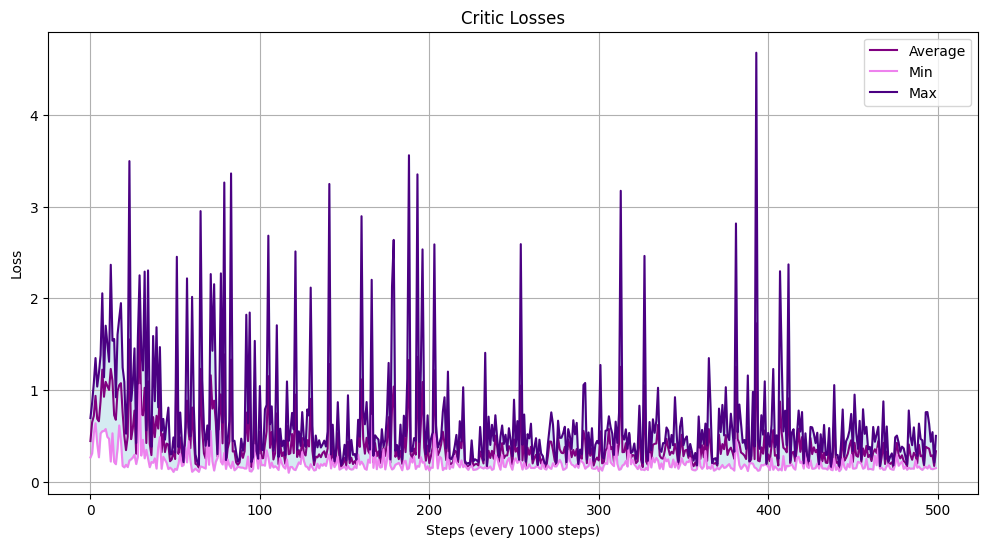

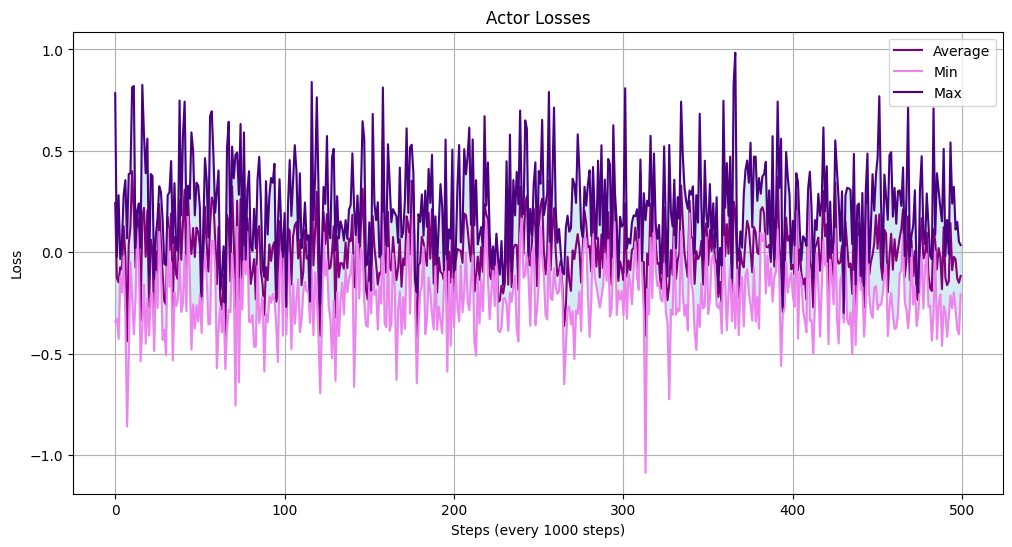

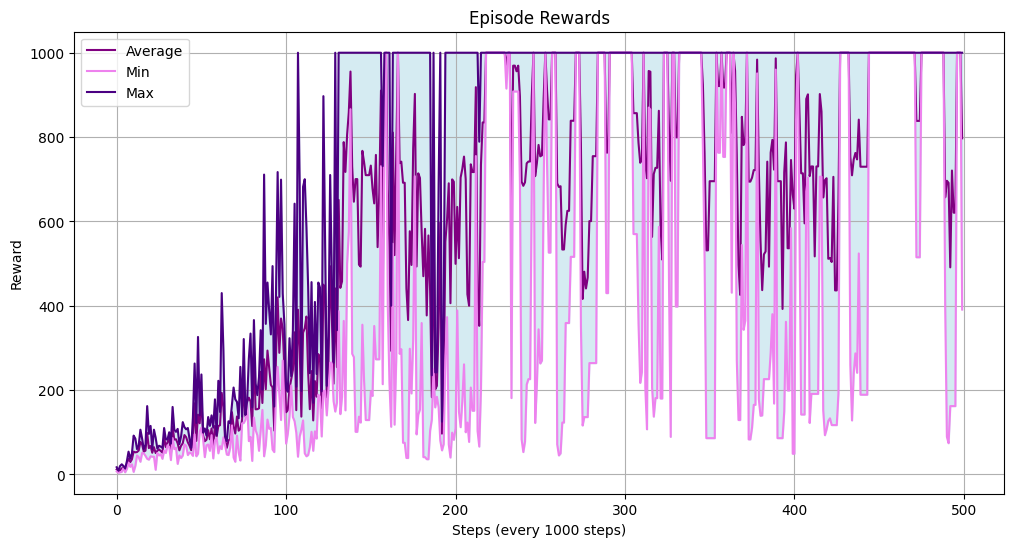

In [4]:
# Get stats 
min_critic_losses, max_critic_losses, avg_critic_losses = get_stats(all_critic_losses)
min_actor_losses, max_actor_losses, avg_actor_losses = get_stats(all_actor_losses)
min_episode_rewards, max_episode_rewards, avg_episode_rewards = get_stats(all_episode_rewards)

save_plots = True
folder_name = 'agent6_new'

# Plot stats 
plot_stats(save_plots, folder_name, min_critic_losses, max_critic_losses, avg_critic_losses, title='Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_stats(save_plots, folder_name, min_actor_losses, max_actor_losses, avg_actor_losses, title='Actor Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_stats(save_plots, folder_name, min_episode_rewards, max_episode_rewards, avg_episode_rewards, title='Episode Rewards', ylabel='Reward', xlabel='Steps (every 1000 steps)')

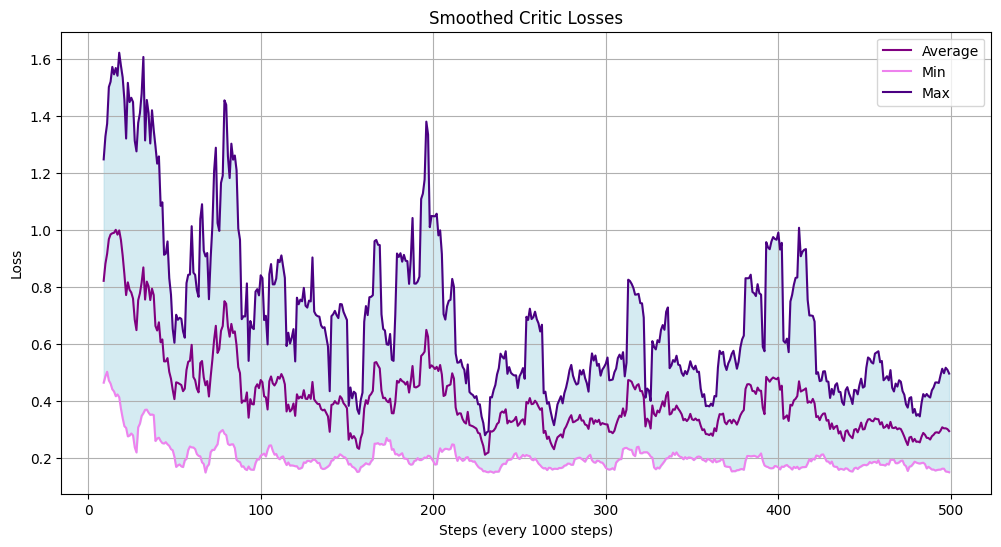

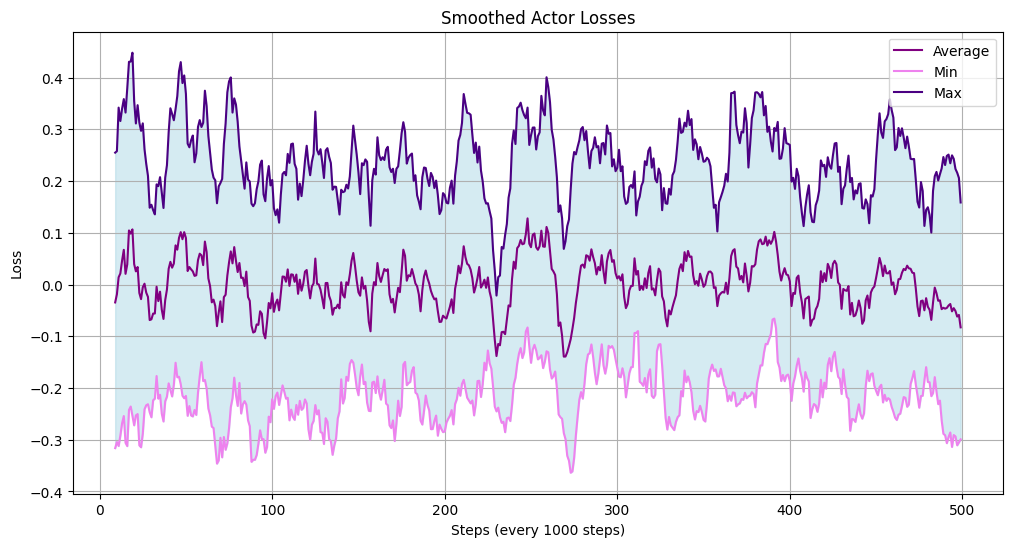

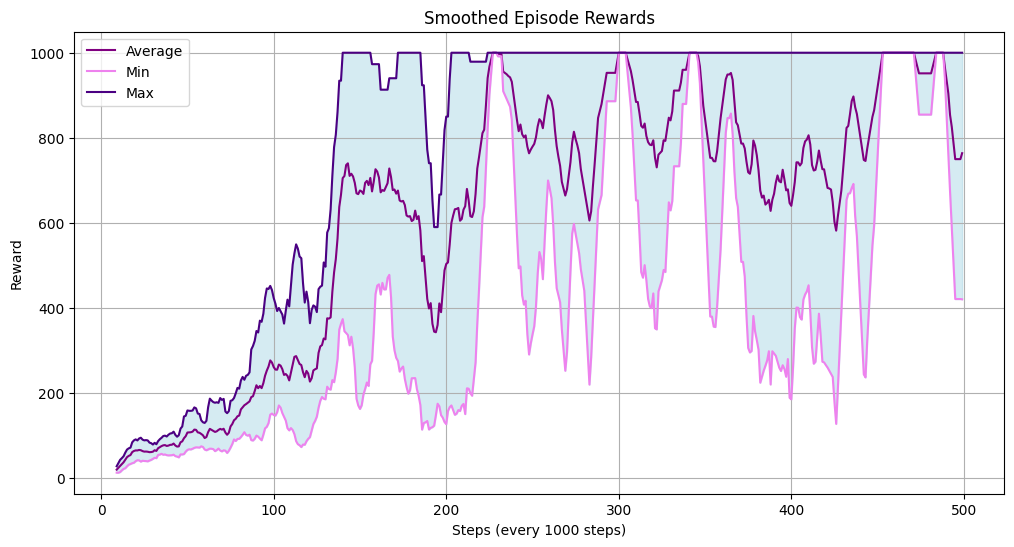

In [5]:
# Plot smoothed stats 
window_size = 10

plot_smoothed_stats(save_plots, folder_name, min_critic_losses, max_critic_losses, avg_critic_losses, window_size, title='Smoothed Critic Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_smoothed_stats(save_plots, folder_name, min_actor_losses, max_actor_losses, avg_actor_losses, window_size, title='Smoothed Actor Losses', ylabel='Loss', xlabel='Steps (every 1000 steps)')
plot_smoothed_stats(save_plots, folder_name, min_episode_rewards, max_episode_rewards, avg_episode_rewards, window_size, title='Smoothed Episode Rewards', ylabel='Reward', xlabel='Steps (every 1000 steps)')

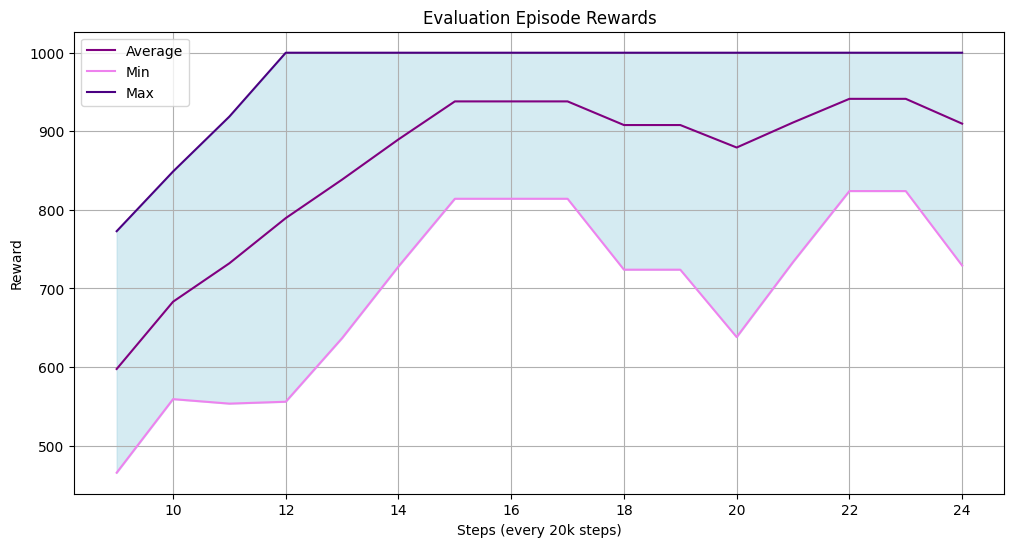

In [6]:
# Get stats for evaluation rewards
min_eval_rew, max_eval_rew, avg_eval_rew = get_stats(all_evaluation_reward_means)

# Plot stats
plot_smoothed_stats(save_plots, folder_name, min_eval_rew, max_eval_rew, avg_eval_rew, window_size, title='Evaluation Episode Rewards',ylabel='Reward',xlabel='Steps (every 20k steps)')

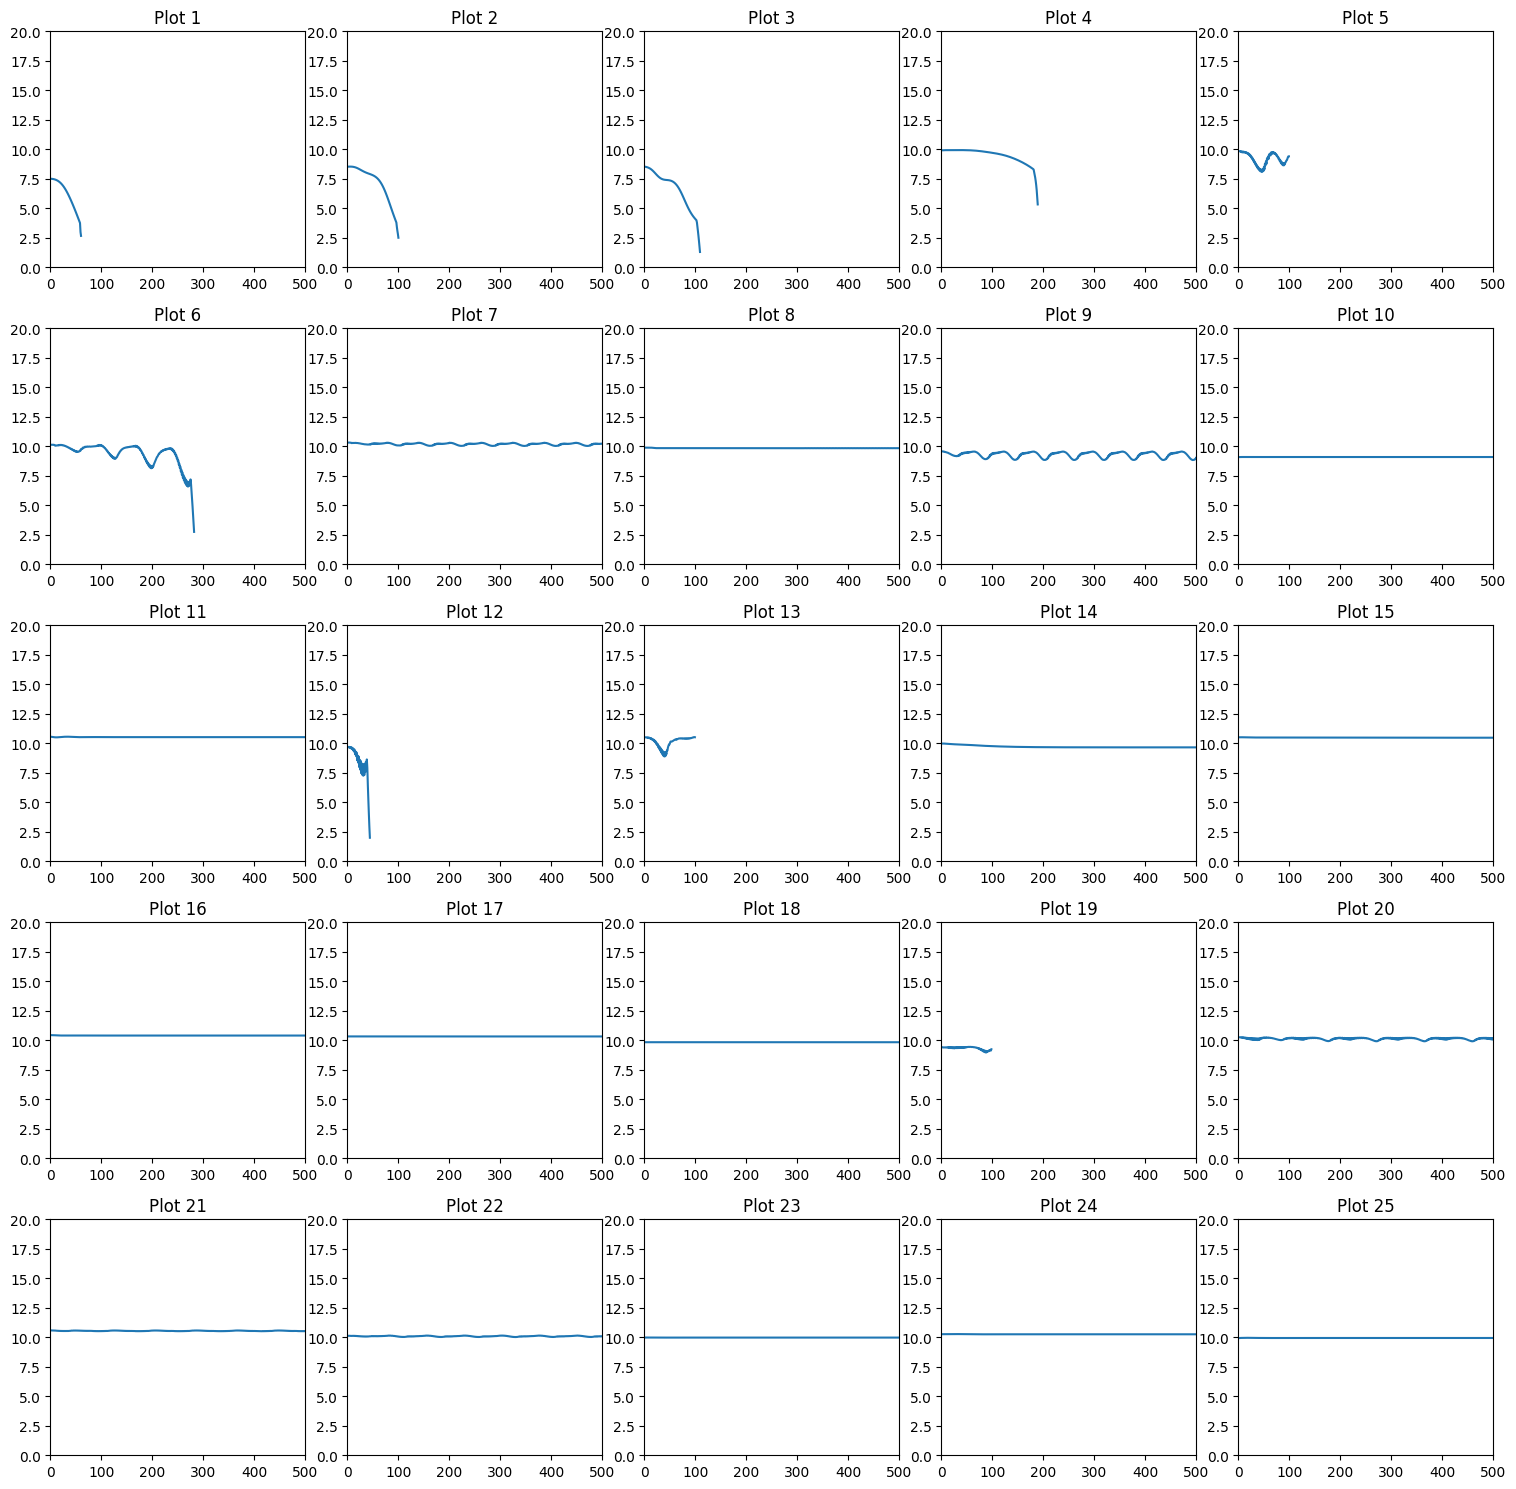

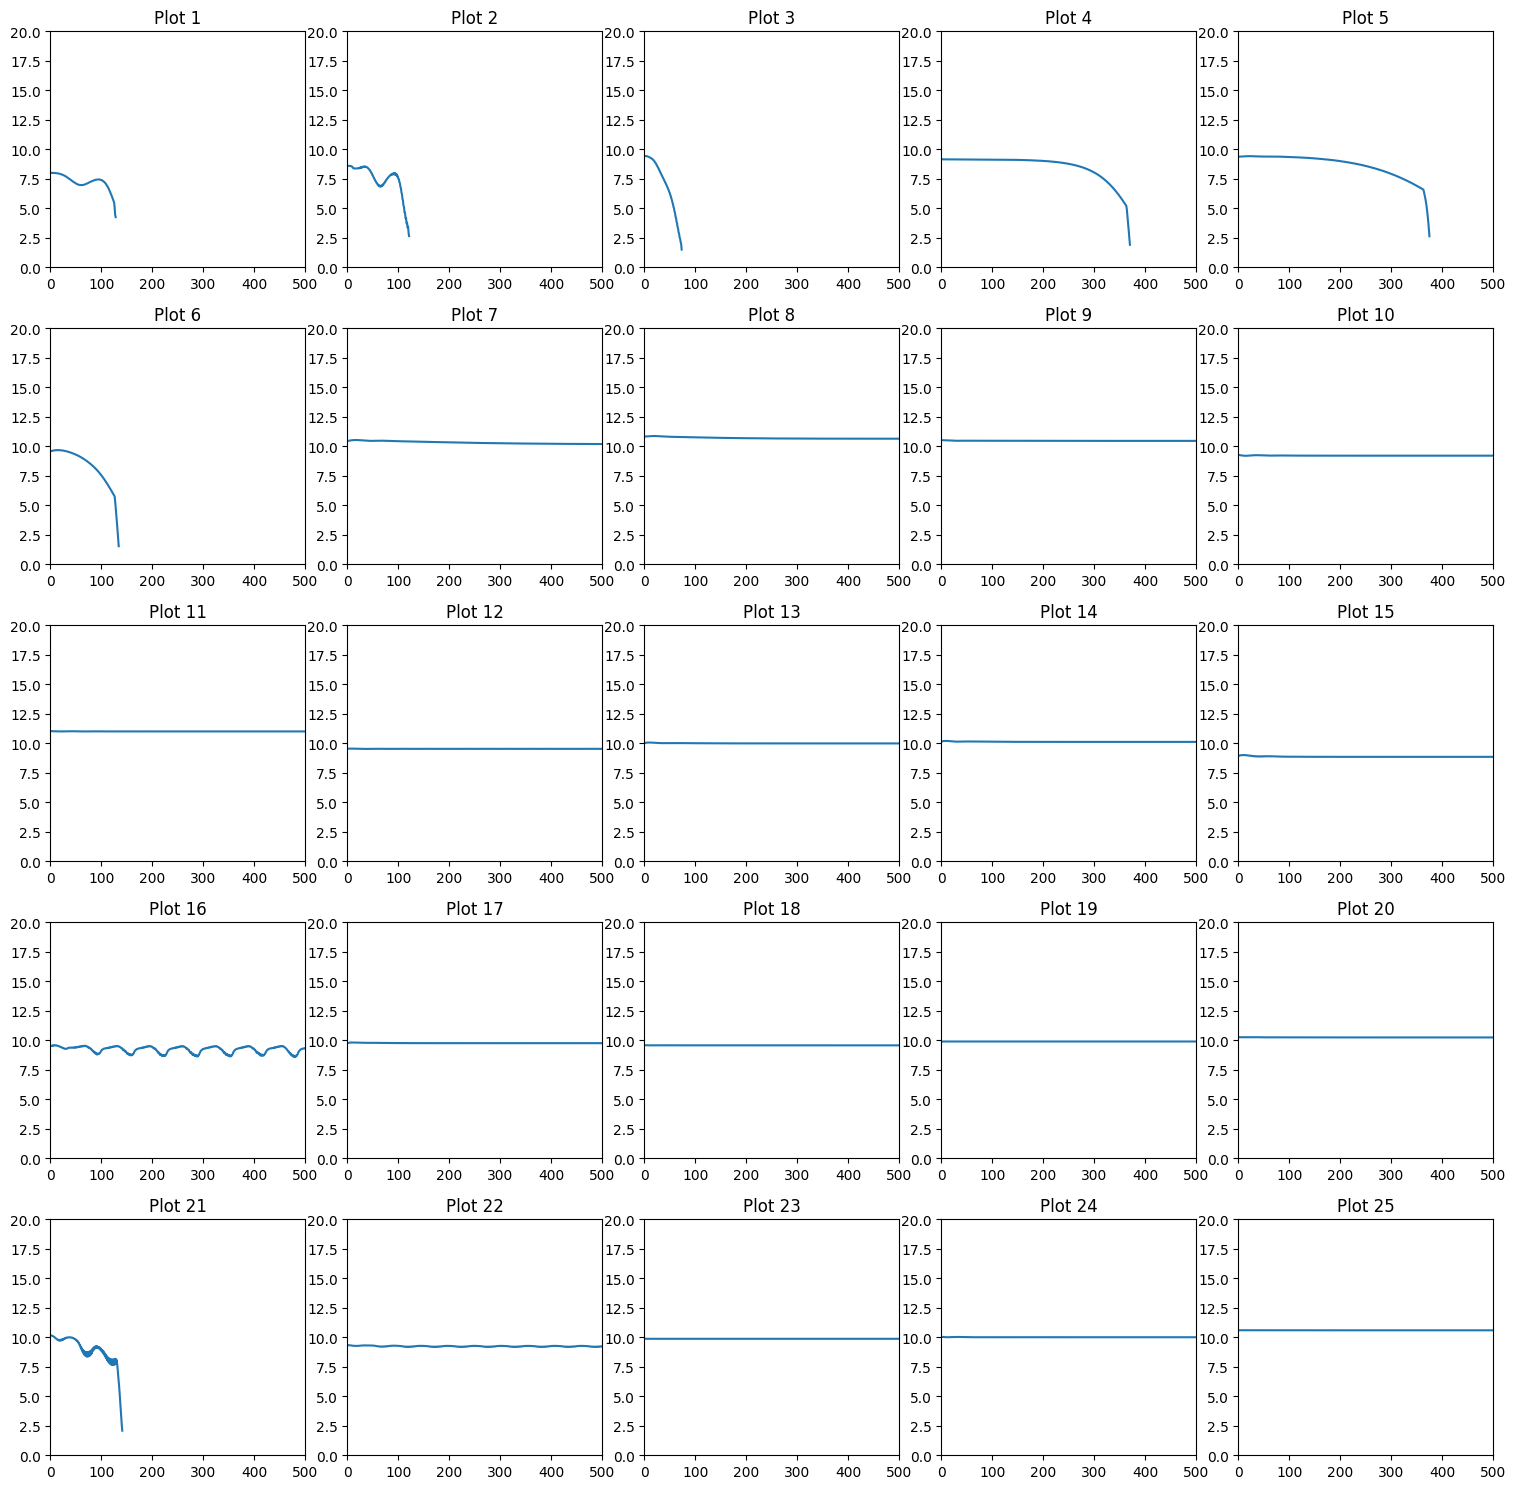

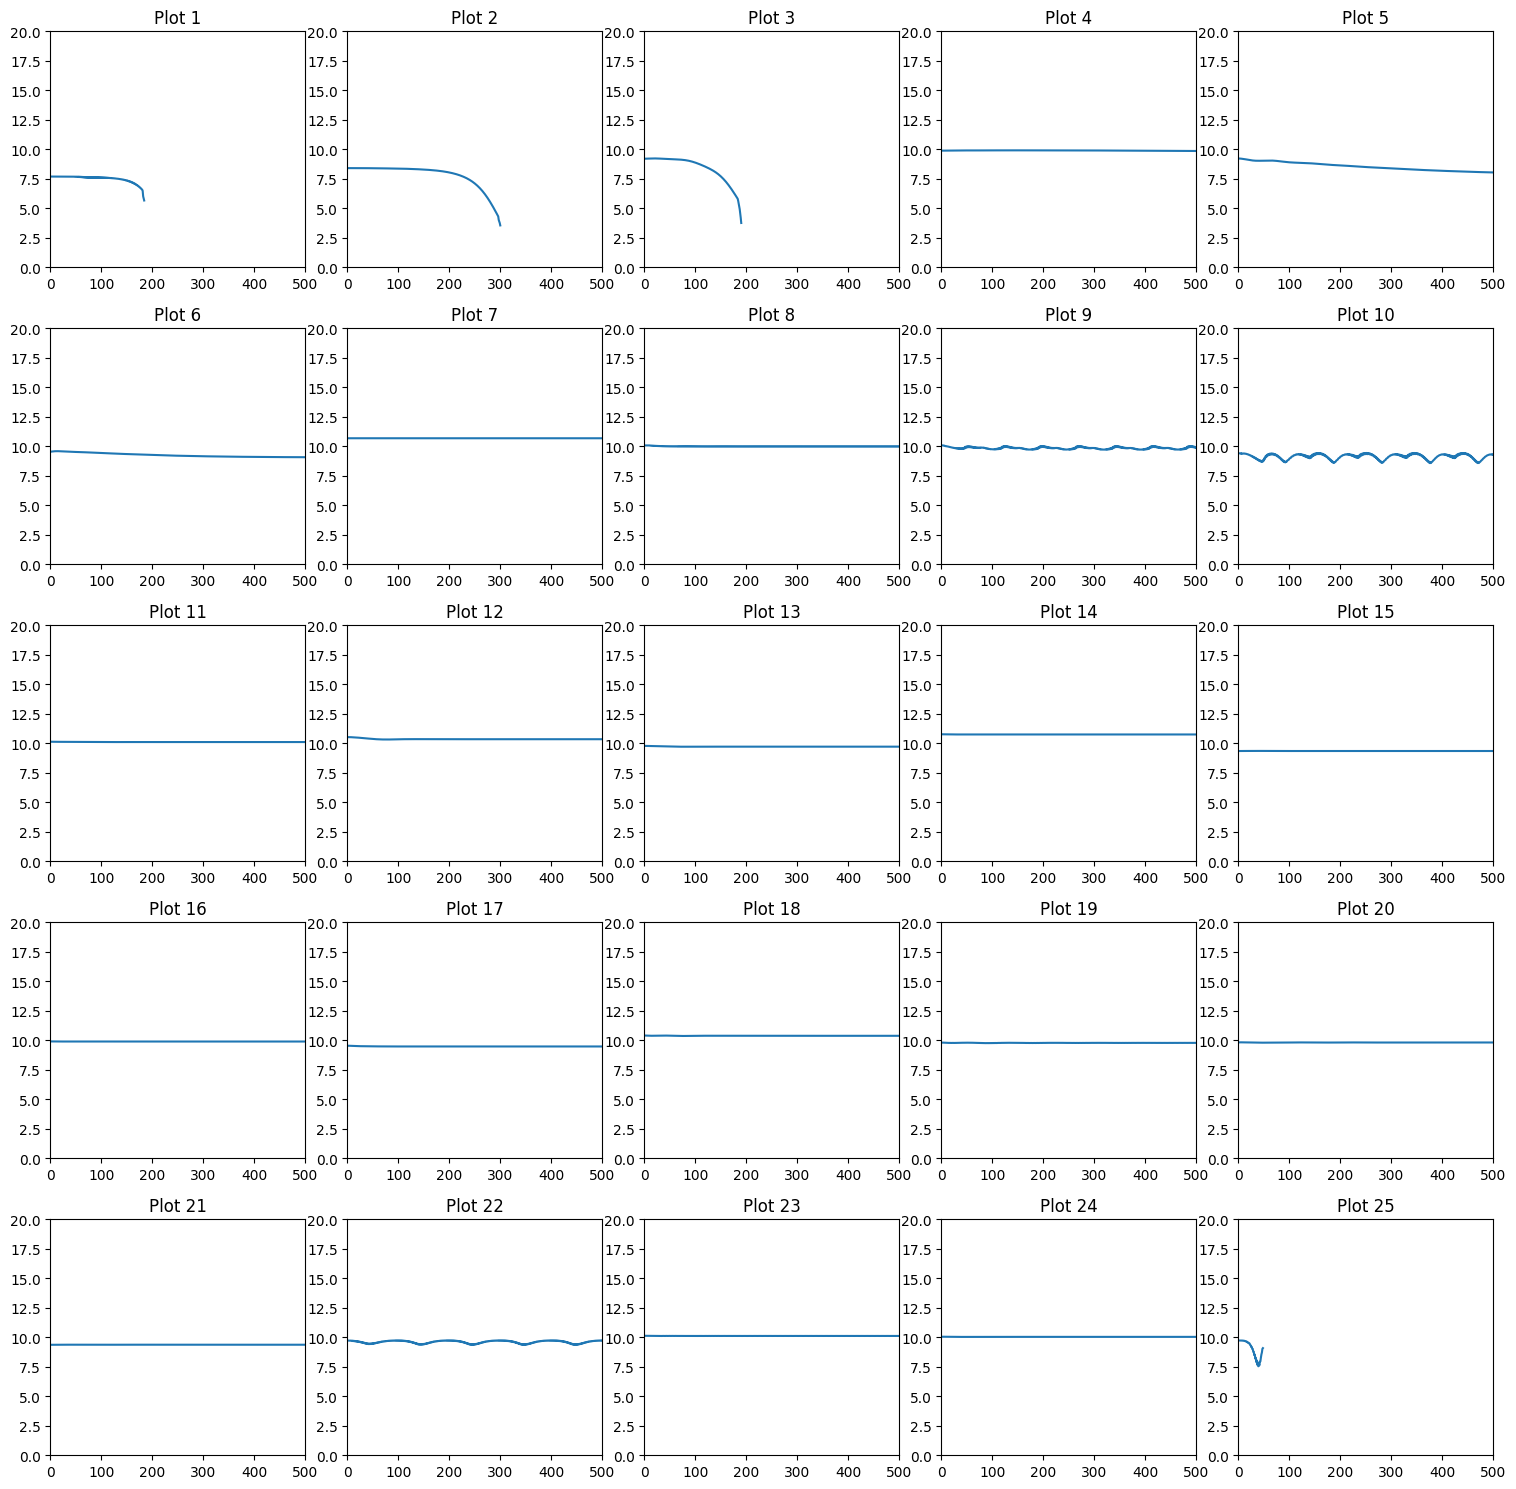

In [7]:
plot_and_save_trajectories(save_plots, folder_name, all_evaluation_value_trajectories, x_range=[0, 500], y_range=[0, 20])


### saving agents and data

In [9]:
folder_name = "data/data_agent6"

os.makedirs(folder_name, exist_ok=True)

# # Save all_* dictionaries
with open(folder_name+'/all_dicts.pkl', 'wb') as f:
    pickle.dump([all_critic_losses, all_actor_losses, all_episode_rewards, \
                 all_evaluation_reward_means, all_evaluation_reward_stds, all_evaluation_value_trajectories], f)

# Save agent3 dictionary
with open(folder_name+'/agent.pkl', 'wb') as f:
    pickle.dump(agent, f)

# # Save seed list used for training
with open(folder_name+'/seeds.pkl', 'wb') as f:
    pickle.dump(seeds, f)